In [1]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

This script is an introduction to stochastic simulation algorithms (commonly known as Gillespie simulations in the chemical kinetics community). The function below simulates time histories of allele frequencies in populations, optionally with selection.

In [27]:
def stochastic_sim_drift(pop_size, n_gen, init_freq, n_pop, selec=0):
    """Inputs: pop_size is # of alleles in a population
        n_gen is # of generations to simulate
        init_freq is initial allele frequency
        n_pop is # of populations to run in parallel
        Return: an n_pop by n_gen matrix of population histories"""
    # first create 2D output array
    frequency = np.zeros([n_pop, n_gen])
    # initialize with input
    frequency[:, 0] = init_freq
    
    # loop over parallel populations
    for i in range(n_pop):
        # loop over time for one population
        for j in range(1, n_gen):
            # flip a coin for each allele in population
            coins = np.random.rand(pop_size)
            # decide if each new allele is 'A' or 'a' based on 
            # frequency from prev generation
            # superfreak is new threshold frequency
            superfreak = frequency[i, j-1] * (1 - selec) \
                            / (1 - selec * frequency[i, j-1])
            num_A = np.sum(coins < superfreak)

            # calc & store new allele frequency
            frequency[i, j] = num_A / pop_size
    return frequency

You can play with parameters below to estimate the time to fixation as a function of selection coefficient and population size. Theory predicts that the inverse of mean time to fixation should be proportional to selection coefficient.

In [71]:
n_gen = 100
history = stochastic_sim_drift(100, n_gen, 0.5, 100, 2e-1)

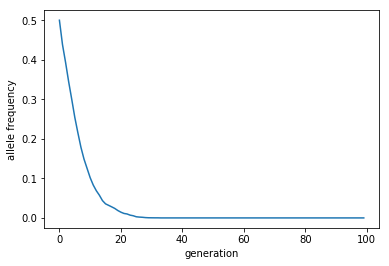

In [72]:
time = np.arange(n_gen)
mean_trace = np.mean(np.transpose(history), axis=1)
_ = plt.plot(time, mean_trace)
plt.xlabel('generation')
plt.ylabel('allele frequency')